In [ ]:
# Created By Venujan Malaiyandi
# BSCP|CS|61|101
# For Task 5.2C
# Cyber Security Analytics

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap


In [17]:

# Read the dataset from the file
data = np.genfromtxt('task6_1_dataset.csv', delimiter=',', skip_header=1)


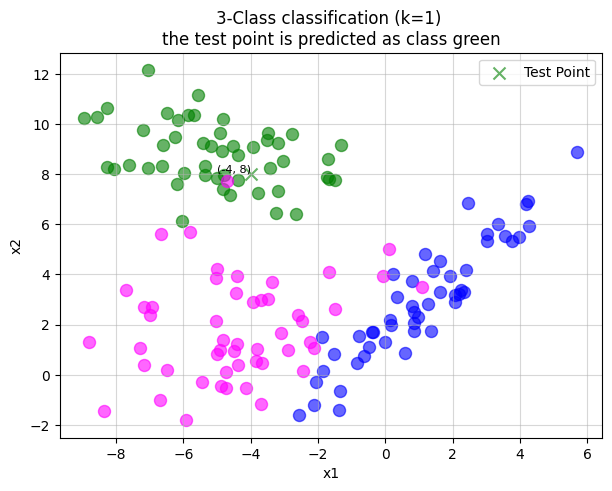

In [22]:
# Extract features (x1, x2) and labels (y)
X_train = data[:, 1:3]
y_train = data[:, 3]

# Create kNN classifier with k=1
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_train, y_train)

# Test the kNN classifier with the first testing point [-4, 8]
X_test = np.array([[-4, 8]])
y_pred = knn_classifier.predict(X_test)

# Visualize the data and the testing point
fig, ax = plt.subplots(figsize=(7, 5), dpi=100)

# Scatter plot for training points
for i in range(len(data)):
    color = ['green', 'blue', 'magenta'][int(data[i, 3])]
    ax.scatter(data[i, 1], data[i, 2], c=color, s=75, alpha=0.6)

# Scatter plot for the testing point
color_pred = ['green', 'blue', 'magenta'][int(y_pred[0])]
ax.scatter(X_test[0, 0], X_test[0, 1], marker='x', c=color_pred, s=75, alpha=0.6, label='Test Point')

# Add light grid lines
ax.grid(True, linestyle='-', alpha=0.5)

# Display coordinates near the test point
ax.text(X_test[0, 0], X_test[0, 1], f'({X_test[0, 0]}, {X_test[0, 1]})', fontsize=8, ha='right', va='bottom', color='black')

# Set plot title
ax.set_title('3-Class classification (k=1) \nthe test point is predicted as class green')

# Set axis labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')

# Show legend
ax.legend()

# Display the plot
plt.show()


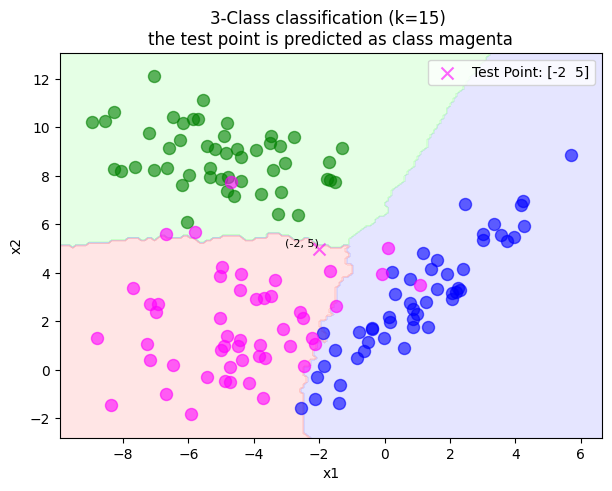

In [23]:
# Extract features (x1, x2) and labels (y)
X_train = data[:, 1:3]
y_train = data[:, 3]

# Create kNN classifier with k=15
knn_classifier = KNeighborsClassifier(n_neighbors=15)
knn_classifier.fit(X_train, y_train)

# Test the kNN classifier with the second testing point [-2, 5]
X_test = np.array([[-2, 5]])
y_pred = knn_classifier.predict(X_test)

# Visualize the data and the second testing point with color maps
fig, ax = plt.subplots(figsize=(7, 5), dpi=100)

# Create color maps/decision boundaries
cmap_light = ListedColormap(['#AAFFAA', '#AAAAFF', '#FFAAAA'])

# Create a coarser meshgrid for the background
x_min, x_max = data[:, 1].min() - 1, data[:, 1].max() + 1
y_min, y_max = data[:, 2].min() - 1, data[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Plot decision boundaries
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3)

# Scatter plot for training points
for i in range(len(data)):
    color = ['green', 'blue', 'magenta'][int(data[i, 3])]
    ax.scatter(data[i, 1], data[i, 2], c=color, s=75, alpha=0.6)

# Scatter plot for the testing point
color_pred = ['green', 'blue', 'magenta'][int(y_pred[0])]
ax.scatter(X_test[0, 0], X_test[0, 1], marker='x', c=color_pred, s=75, alpha=0.6, label=f'Test Point: {X_test[0]}')

# Display coordinates near the test point
ax.text(X_test[0, 0], X_test[0, 1], f'({X_test[0, 0]}, {X_test[0, 1]})', fontsize=8, ha='right', va='bottom', color='black')

# Set plot title
ax.set_title('3-Class classification (k=15) \nthe test point is predicted as class magenta')

# Set axis labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')

# Show legend
ax.legend()

# Display the plot
plt.show()